In [141]:
from urllib.request import urlopen
import requests
import pandas as pd
import json
from pandas import json_normalize
import numpy as np

In [142]:
Key="WEZlzcMzFyEo7Z6GpQ2Lo8ITQjmWgEywhZbvBhCc"

In [143]:
# get the API data
response = requests.get("https://api.nal.usda.gov/fdc/v1/foods/list?api_key="+Key)

In [144]:
data=response.json()
data

[{'fdcId': 1104067,
  'description': '100 GRAND Bar',
  'dataType': 'Survey (FNDDS)',
  'publicationDate': '2020-10-30',
  'foodCode': '91715300',
  'foodNutrients': [{'number': '203',
    'name': 'Protein',
    'amount': 2.5,
    'unitName': 'G'},
   {'number': '204',
    'name': 'Total lipid (fat)',
    'amount': 19.3,
    'unitName': 'G'},
   {'number': '205',
    'name': 'Carbohydrate, by difference',
    'amount': 71.0,
    'unitName': 'G'},
   {'number': '208', 'name': 'Energy', 'amount': 468, 'unitName': 'KCAL'},
   {'number': '221', 'name': 'Alcohol, ethyl', 'amount': 0.0, 'unitName': 'G'},
   {'number': '255', 'name': 'Water', 'amount': 6.1, 'unitName': 'G'},
   {'number': '262', 'name': 'Caffeine', 'amount': 8.0, 'unitName': 'MG'},
   {'number': '263', 'name': 'Theobromine', 'amount': 55.0, 'unitName': 'MG'},
   {'number': '269',
    'name': 'Sugars, total including NLEA',
    'amount': 51.9,
    'unitName': 'G'},
   {'number': '291',
    'name': 'Fiber, total dietary',
    '

In [145]:
# Normalize the json data into a data frame
dataframe=pd.json_normalize(data)
dataframe

,fdcId,description,dataType,publicationDate,foodCode,foodNutrients,ndbNumber
0,1104067,100 GRAND Bar,Survey (FNDDS),2020-10-30,91715300,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
1,1104086,3 MUSKETEERS Bar,Survey (FNDDS),2020-10-30,91726420,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
2,1104087,3 Musketeers Truffle Crisp Bar,Survey (FNDDS),2020-10-30,91726425,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
3,1099098,"Abalone, cooked, NS as to cooking method",Survey (FNDDS),2020-10-30,26301110,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
4,1099099,"Abalone, floured or breaded, fried",Survey (FNDDS),2020-10-30,26301140,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
5,1099100,"Abalone, steamed or poached",Survey (FNDDS),2020-10-30,26301160,"[{'number': '203', 'name': 'Protein', 'amount'...",NaN
6,167782,"Abiyuch, raw",SR Legacy,2019-04-01,NaN,"[{'number': '318', 'name': 'Vitamin A, IU', 'a...",9427
7,171687,"Acerola juice, raw",SR Legacy,2019-04-01,NaN,"[{'number': '268', 'name': 'Energy', 'amount':...",9002
8,171686,"Acerola, (west indian cherry), raw",SR Legacy,2019-04-01,NaN,"[{'number': '268', 'name': 'Energy', 'amount':...",9001
9,168061,Acorn stew (Apache),SR Legacy,2019-04-01,NaN,"[{'number': '429', 'name': 'Vitamin K (Dihydro...",35182


In [146]:
# Normalize a column that has json data (multi level json data)
foodNutrients = json_normalize(data=data, record_path='foodNutrients',meta=['foodCode', 'description','fdcId'],errors='ignore')
foodNutrients.head(10)

,number,name,amount,unitName,derivationCode,derivationDescription,foodCode,description,fdcId
0,203,Protein,2.5,G,NaN,NaN,91715300,100 GRAND Bar,1104067
1,204,Total lipid (fat),19.3,G,NaN,NaN,91715300,100 GRAND Bar,1104067
2,205,"Carbohydrate, by difference",71.0,G,NaN,NaN,91715300,100 GRAND Bar,1104067
3,208,Energy,468.0,KCAL,NaN,NaN,91715300,100 GRAND Bar,1104067
4,221,"Alcohol, ethyl",0.0,G,NaN,NaN,91715300,100 GRAND Bar,1104067
5,255,Water,6.1,G,NaN,NaN,91715300,100 GRAND Bar,1104067
6,262,Caffeine,8.0,MG,NaN,NaN,91715300,100 GRAND Bar,1104067
7,263,Theobromine,55.0,MG,NaN,NaN,91715300,100 GRAND Bar,1104067
8,269,"Sugars, total including NLEA",51.9,G,NaN,NaN,91715300,100 GRAND Bar,1104067
9,291,"Fiber, total dietary",1.0,G,NaN,NaN,91715300,100 GRAND Bar,1104067


In [147]:
# select required columns
foodNutrients_new=foodNutrients[["fdcId","description","name","amount","unitName"]]
foodNutrients_new.head(10)

,fdcId,description,name,amount,unitName
0,1104067,100 GRAND Bar,Protein,2.5,G
1,1104067,100 GRAND Bar,Total lipid (fat),19.3,G
2,1104067,100 GRAND Bar,"Carbohydrate, by difference",71.0,G
3,1104067,100 GRAND Bar,Energy,468.0,KCAL
4,1104067,100 GRAND Bar,"Alcohol, ethyl",0.0,G
5,1104067,100 GRAND Bar,Water,6.1,G
6,1104067,100 GRAND Bar,Caffeine,8.0,MG
7,1104067,100 GRAND Bar,Theobromine,55.0,MG
8,1104067,100 GRAND Bar,"Sugars, total including NLEA",51.9,G
9,1104067,100 GRAND Bar,"Fiber, total dietary",1.0,G


In [148]:
# Define new columns
new_cols=['fdcid','ItemDescription','PropertyName','Amount','UnitType']
# Replace headers with new columns
foodNutrients_new.columns = new_cols
foodNutrients_new.head(10)

,fdcid,ItemDescription,PropertyName,Amount,UnitType
0,1104067,100 GRAND Bar,Protein,2.5,G
1,1104067,100 GRAND Bar,Total lipid (fat),19.3,G
2,1104067,100 GRAND Bar,"Carbohydrate, by difference",71.0,G
3,1104067,100 GRAND Bar,Energy,468.0,KCAL
4,1104067,100 GRAND Bar,"Alcohol, ethyl",0.0,G
5,1104067,100 GRAND Bar,Water,6.1,G
6,1104067,100 GRAND Bar,Caffeine,8.0,MG
7,1104067,100 GRAND Bar,Theobromine,55.0,MG
8,1104067,100 GRAND Bar,"Sugars, total including NLEA",51.9,G
9,1104067,100 GRAND Bar,"Fiber, total dietary",1.0,G


In [149]:
# Identify if the item lsit is duplicated
print("Item is duplicated - {}".format(any(foodNutrients_new.ItemDescription.duplicated())))

Item is duplicated - True


In [150]:
# Check for NaN in the columns
print("The column fdcid contains NaN - %r " % foodNutrients_new.fdcid.isnull().values.any())
print("The column ItemDescription contains NaN - %s " % foodNutrients_new.ItemDescription.isnull().values.any())
print("The column PropertyName contains NaN - %s " % foodNutrients_new.PropertyName.isnull().values.any())

The column fdcid contains NaN - False 
The column ItemDescription contains NaN - False 
The column PropertyName contains NaN - False 


In [151]:
# Identify outliers. In this case records that have "Amount" as none 
size_prev = foodNutrients_new.shape
foodNutrients_new2 = foodNutrients_new[np.isfinite(foodNutrients_new['Amount'])] 
size_after = foodNutrients_new2.shape
# Reporting the difference in size
print("The size of previous data was - {prev[0]} rows and the size of the new one is {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 3194 rows and the size of the new one is 3194 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x2702ffd73a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2702ffd7a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2702ffd7040>],
 'medians': [<matplotlib.lines.Line2D at 0x27030673160>],
 'fliers': [<matplotlib.lines.Line2D at 0x270306734c0>],
 'means': []}

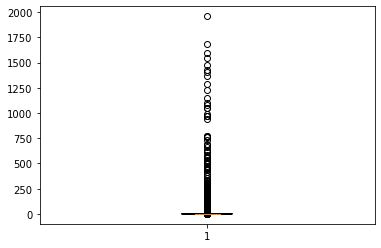

In [153]:
# Plotting Box plots to check outliers
import matplotlib.pyplot as plt
plt.boxplot(foodNutrients_new2.Amount, notch=True)

In [155]:
# Preserving only the Calories that are less than 1700 Gms to remove outliers
foodNutrients_new3 = foodNutrients_new2[(foodNutrients_new2['Amount'] <= 1500)]
print("After getting rid of outliers the new size of the data is {}".format(*foodNutrients_new3.shape))

After getting rid of outliers the new size of the data is 3190


In [156]:
from Levenshtein import distance
# Conduct fuzzy matching
name_of_group='ItemDescription'
foodNutrients_new3['ItemDescription']
for k in foodNutrients_new3['ItemDescription']:
    print("{} {} {}".format(k,name_of_group,distance(name_of_group,k)))

100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND Bar ItemDescription 15
100 GRAND 

Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native) ItemDescription 49
Agutuk, meat

Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, liqueur, coffee, 63 proof ItemDescription 40
Alcoholic beverage, lique